In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
%load_ext autoreload
%autoreload 2
from negbin_val_functions import *

In [3]:
labels = ["islam", "gse5\n2i", "gse5\nserum", "celseq2\ncs1_man", "celseq2\ncs2_man",
          "celseq2\ncs2_c1", "zeisel*"]
flat_labels = ["islam", "gse5 2i", "gse5 serum", "celseq2 cs1_man", "celseq2 cs2_man",
               "celseq2 cs2_c1", "zeisel*"]
zeisel_labels = ['Astro1', 'Astro2', 'CA1Pyr1', 'CA1Pyr2', 'CA1PyrInt', 'CA2Pyr2',
       'Choroid', 'ClauPyr', 'Epend', 'Int1', 'Int2', 'Int3', 'Int4', 'Int5',
       'Int6', 'Int7', 'Int8', 'Int9', 'Int10', 'Int11', 'Int12',
       'Int13', 'Int14', 'Int15', 'Int16', 'Mgl1', 'Mgl2', 'Oligo1', 'Oligo2',
       'Oligo3', 'Oligo4', 'Oligo5', 'Oligo6', 'Peric', 'Pvm1', 'Pvm2',
       'S1PyrDL', 'S1PyrL23', 'S1PyrL4', 'S1PyrL5', 'S1PyrL5a', 'S1PyrL6',
       'S1PyrL6b', 'SubPyr', 'Vend1', 'Vend2', 'Vsmc']
celseq_labels = ["cs1_man", "cs2_man", "cs2_c1"]
gse5_labels = ["cells2i", "serum"]
islam_labels = ["islam"]

all_labels = islam_labels + gse5_labels + celseq_labels + zeisel_labels
all_datasets = len(all_labels)

In [4]:
read_all("islam", "islam")

(array([0, 1, 2]), array([9222, 1395, 3280]))

read and plot Bayes information criterion (BIC) goodness-of-fit for the different datasets

In [5]:
bic = np.zeros((all_datasets, 3))
raw = read_all("islam", "islam")
bic[0][raw[0]] = raw[1]
raw = read_all("gse5", "cells2i")
bic[1][raw[0]] = raw[1]
raw = read_all("gse5", "serum")
bic[2][raw[0]] = raw[1]
raw = read_all("celseq2", "cs1_man")
bic[3][raw[0]] = raw[1]
raw = read_all("celseq2", "cs2_man")
bic[4][raw[0]] = raw[1]
raw = read_all("celseq2", "cs2_c1")
bic[5][raw[0]] = raw[1]

for i in range(len(zeisel_labels)):
    raw = read_all("zeisel", zeisel_labels[i])
    bic[6 + i][raw[0]] = raw[1]

Different functions were fitted to the count distribution in cells and controls. The goodness of fit was assessed by calculating the BIC. The bar plot shows the fraction of genes for which a given distribution had a better BIC score than the others.

In [6]:
N = 7
x = np.arange(N)
normals = np.zeros(N)
poisson = np.zeros(N)
negbins = np.zeros(N)

negbins[0:6] = bic[0:6, 0] / np.sum(bic[0:6], axis=1)
poisson[0:6] = bic[0:6, 1] / np.sum(bic[0:6], axis=1)
normals[0:6] = bic[0:6, 2] / np.sum(bic[0:6], axis=1)

zeisel_start = 6
zeisel_end = 6 + len(zeisel_labels)
negbs = bic[zeisel_start:zeisel_end, 0] / np.sum(bic[zeisel_start:zeisel_end], axis=1)
poiss = bic[zeisel_start:zeisel_end, 1] / np.sum(bic[zeisel_start:zeisel_end], axis=1)
norms = bic[zeisel_start:zeisel_end, 2] / np.sum(bic[zeisel_start:zeisel_end], axis=1)
normals[6] = np.mean(norms)
poisson[6] = np.mean(poiss)
negbins[6] = np.mean(negbs)

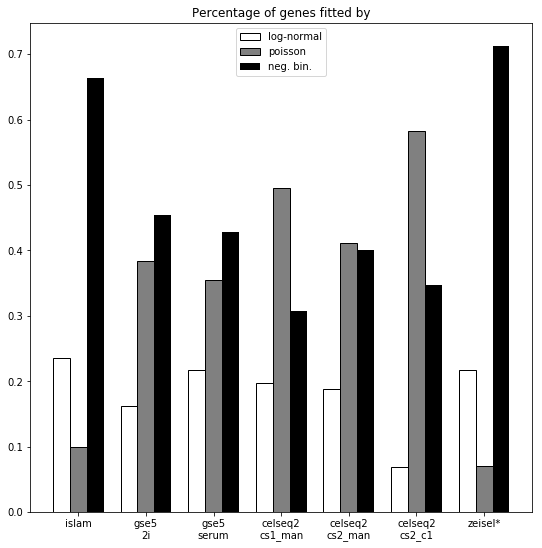

In [7]:
width=0.25

fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
no = ax.bar(x, normals, width, color='white')
# due to a matplotlib bug in version 2.1 the edge color has
# to be set manually
for bar in no:
    bar.set_edgecolor("black")
    bar.set_linewidth(1)
po = ax.bar(x+width, poisson, width, color='grey')
for bar in po:
    bar.set_edgecolor("black")
    bar.set_linewidth(1)
nb = ax.bar(x+2*width, negbins, width, color='black')

ax.set_xticks(x + width)
ax.set_xticklabels((labels))
ax.set_title("Percentage of genes fitted by")
l = ax.legend((no[0], po[0], nb[0]), ("log-normal", "poisson", "neg. bin."), loc="upper center")

asterisk (\*) denotes average over all subgroups in the dataset

motivate scaling choices for simulation

In [7]:
celseq_1 = np.log(np.loadtxt("celseq2/cs1_man_scalings.txt"))
celseq_2 = np.log(np.loadtxt("celseq2/cs2_c1_scalings.txt"))
celseq_3 = np.log(np.loadtxt("celseq2/cs2_man_scalings.txt"))
gse5_1 = np.log(np.loadtxt("gse5/cells2i_scalings.txt"))
gse5_2 = np.log(np.loadtxt("gse5/serum_scalings.txt"))
islam = np.log(np.loadtxt("islam/islam_scalings.txt"))

zeisel = []
for i in range(len(zeisel_labels)):
    scalings = np.log(np.loadtxt("zeisel/" + zeisel_labels[i] + "_scalings.txt"))
    zeisel.append(scalings)

In [8]:
num_cells = np.zeros(6 + len(zeisel))
num_cells[0] = len(islam)
num_cells[1] = len(gse5_1)
num_cells[2] = len(gse5_2)
num_cells[3] = len(celseq_1)
num_cells[4] = len(celseq_3)
num_cells[5] = len(celseq_2)
for i, e in enumerate(zeisel_labels):
    num_cells[6 + i] = len(zeisel[i])

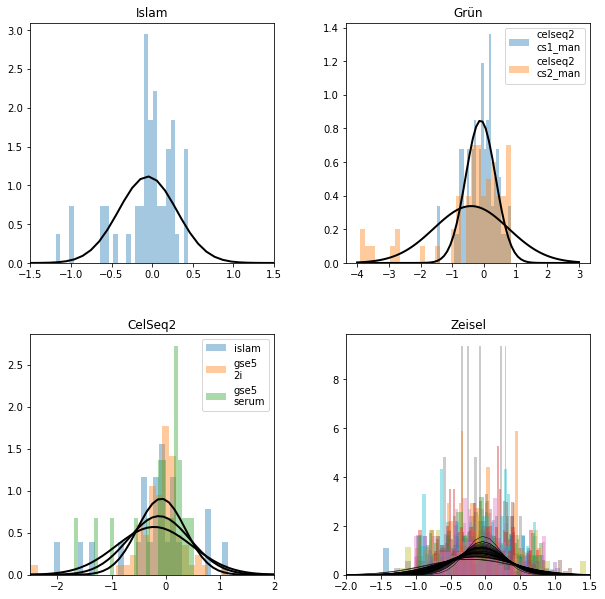

In [12]:
zeisel_smu = np.zeros(len(zeisel_labels))
zeisel_sstd = np.zeros(len(zeisel_labels))

fig, ax = plt.subplots(ncols=2, nrows=2)
fig.tight_layout()
fig.set_size_inches(9, 9)
x = np.linspace(-4, 3, 70)

smu6, sstd6 = hist_and_fit(islam, x, ax[0][0], "Islam", bins=30)
ax[0][0].set_title("Islam")
ax[0][0].set_xlim(-1.5, 1.5)

smu4, sstd4 = hist_and_fit(gse5_1, x, ax[0][1], labels[3], bins=30)
smu5, sstd5 = hist_and_fit(gse5_2, x, ax[0][1], labels[4], bins=30)
ax[0][1].set_title("Grün")
ax[0][1].legend()

smu1, sstd1 = hist_and_fit(celseq_1, x, ax[1][0], labels[0], bins=30)
smu2, sstd2 = hist_and_fit(celseq_2, x, ax[1][0], labels[1], bins=30)
smu3, sstd3 = hist_and_fit(celseq_3, x, ax[1][0], labels[2], bins=30)
ax[1][0].set_title("CelSeq2")
ax[1][0].set_xlim(-2.5, 2)
ax[1][0].legend()

for i in range(len(zeisel_labels)):
    zeisel_smu[i], zeisel_sstd[i] = hist_and_fit(zeisel[i], x, ax[1][1], zeisel_labels[i], lwd=0.5, bins=30)
ax[1][1].set_title("Zeisel")
ax[1][1].set_xlim(-2, 1.5)

plt.show()

In [13]:
scalings = np.array([smu6, smu4, smu5, smu1, smu2, smu3])
scalings = np.concatenate((scalings, zeisel_smu))
np.mean(scalings)

-0.10156217431452456

In [14]:
scalings = np.array([sstd6, sstd4, sstd5, sstd1, sstd2, sstd3])
scalings = np.concatenate((scalings, zeisel_sstd))
np.mean(scalings)

0.44319925662125126

average expression value for each gene

In [15]:
celseq_1 = np.log(np.loadtxt("celseq2/cs1_man_genes.txt"))
celseq_2 = np.log(np.loadtxt("celseq2/cs2_c1_genes.txt"))
celseq_3 = np.log(np.loadtxt("celseq2/cs2_man_genes.txt"))
gse5_1 = np.log(np.loadtxt("gse5/cells2i_genes.txt"))
gse5_2 = np.log(np.loadtxt("gse5/serum_genes.txt"))
islam = np.log(np.loadtxt("islam/islam_genes.txt"))
zeisel_list = list()
for p in zeisel_labels:
    zeisel_list.append(np.log(np.loadtxt("zeisel/" + p + "_genes.txt")))
zeisel = np.concatenate(zeisel_list)

/home/npapado/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


0.9309356870100128
1.7747398404910755


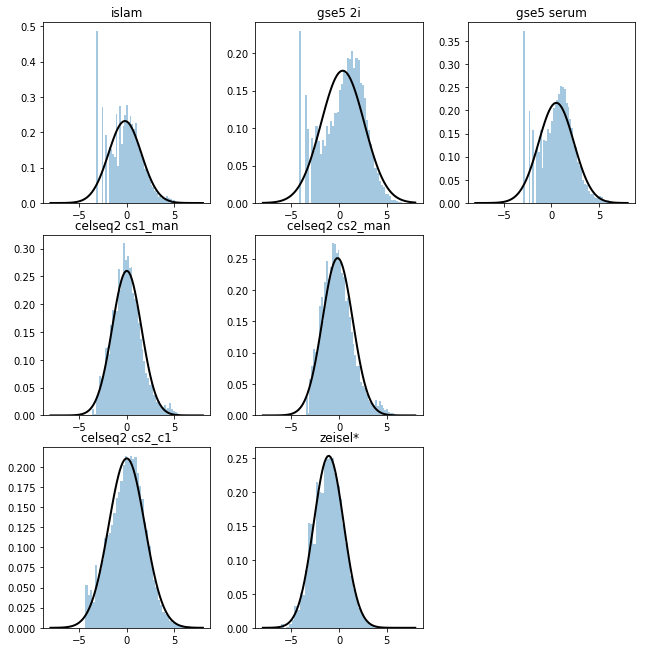

In [16]:
fig, ax = plt.subplots(ncols=3, nrows=3)
fig.set_size_inches(9, 9)
fig.tight_layout()

x = np.linspace(-8, 8, 100)
gmu1, gstd1 = hist_and_fit(celseq_1, x, ax[0][0], flat_labels[0])
gmu2, gstd2 = hist_and_fit(celseq_2, x, ax[0][1], flat_labels[1])
gmu3, gstd3 = hist_and_fit(celseq_3, x, ax[0][2], flat_labels[2])
gmu4, gstd4 = hist_and_fit(gse5_1, x, ax[1][0], flat_labels[3])
gmu5, gstd5 = hist_and_fit(gse5_2, x, ax[1][1], flat_labels[4])
ax[1][2].axis("off")
gmu6, gstd6 = hist_and_fit(islam, x, ax[2][0], flat_labels[5])
noninf = np.invert(np.isinf(zeisel))
gmu7, gstd7 = hist_and_fit(zeisel[noninf], x, ax[2][1], flat_labels[6])
ax[2][2].axis("off")

# chosen mean: 1
print(np.exp(np.mean([gmu1, gmu2, gmu3, gmu4, gmu5, gmu6, gmu7])))

# chosen standard deviation: 0.8
print(np.mean([gstd1, gstd2, gstd3, gstd4, gstd5, gstd6, gstd7]))

there seems to be a big difference between the real average expression variance and the simulated one, but if one takes into account the influence on the spread by the scaling factors, a different image forms:

we take the simulated average expression of 10.000 genes and multiply it with simulated scaling factors of 10.000 cells. This will be closer to the actual distribution of average gene expression values in simulated data before any modification of average gene expression due to differentiation (standard deviation goes from 0.8 to 1.0). Additional variance is introduced by modulation of average gene expression due to differentiation, effectively bringing the spread of average gene expression closer to the real spectrum.

In any case, it is evident that average gene expression is chosen from the center of the spectrum of real average gene expression.

In [17]:
sim_avg_genes = norm.rvs(loc=1, scale=0.8, size=10000)
sim_scales = norm.rvs(loc=0, scale=0.8, size=10000)

In [18]:
celseq_1_genes = norm(loc=gmu1, scale=gstd1)
celseq_2_genes = norm(loc=gmu2, scale=gstd2)
celseq_3_genes = norm(loc=gmu3, scale=gstd3)
gse5_1_genes = norm(loc=gmu4, scale=gstd4)
gse5_2_genes = norm(loc=gmu5, scale=gstd5)
islam_genes = norm(loc=gmu6, scale=gstd6)
zeisel_genes = norm(loc=gmu7, scale=gstd7)

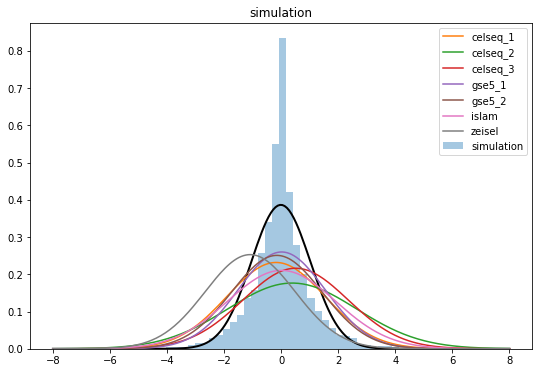

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
x = np.linspace(-8, 8, 200)
simmu, simstd = hist_and_fit(sim_avg_genes * sim_scales, x, ax, "simulation")
ax.plot(x, celseq_1_genes.pdf(x), label="celseq_1")
ax.plot(x, celseq_2_genes.pdf(x), label="celseq_2")
ax.plot(x, celseq_3_genes.pdf(x), label="celseq_3")
ax.plot(x, gse5_1_genes.pdf(x), label="gse5_1")
ax.plot(x, gse5_2_genes.pdf(x), label="gse5_2")
ax.plot(x, islam_genes.pdf(x), label="islam")
ax.plot(x, zeisel_genes.pdf(x), label="zeisel")
ax.legend()

In [20]:
print(np.mean([gmu1, gmu2, gmu3, gmu4, gmu5, gmu6, gmu7]),
      np.mean([gstd1, gstd2, gstd3, gstd4, gstd5, gstd6, gstd7]))
print(simmu, simstd)

-0.07156508356483714 1.7747398404910755
-0.011150766176425542 1.0321720825137628


In [21]:
for i in range(6):
    print(flat_labels[i],
          int(num_cells[i]),
          int(total_genes[i][0]),
          int(delta_bic[i][2]),
          int(delta_bic[i][1]),
          int(delta_bic[i][0]),
          str(round(scalings[i], 3)), sep="\t")

for i, e in enumerate(zeisel_labels):
    print(e,
          int(num_cells[6+i]),
          int(total_genes[6+i][0]),
          int(delta_bic[6+i][2]),
          int(delta_bic[6+i][1]),
          int(delta_bic[6+i][0]),
          str(round(scalings[6+i], 3)), sep="\t")

islam	50	13897	2709	521	8044	0.358
gse5 2i	76	11554	1259	1552	3384	0.471
gse5 serum	63	11740	2138	1675	3718	1.179
celseq2 cs1_man	24	12684	1081	2373	2356	0.7
celseq2 cs2_man	20	13567	905	2219	3486	0.44
celseq2 cs2_c1	70	14895	590	3832	3531	0.571
Astro1	68	747	388	1	218	0.438
Astro2	61	555	315	0	146	0.418
CA1Pyr1	380	8407	1548	23	6470	0.433
CA1Pyr2	447	8351	1096	17	6907	0.423
CA1PyrInt	49	1227	617	1	348	0.293
CA2Pyr2	41	2755	492	62	977	0.293
Choroid	10	38	0	0	34	0.623
ClauPyr	5	164	0	16	84	0.253
Epend	20	183	7	0	120	0.629
Int1	12	452	0	6	381	0.538
Int2	24	1121	22	5	693	0.542
Int3	10	270	0	3	226	0.362
Int4	15	344	0	3	273	0.384
Int5	20	1048	2	9	706	0.535
Int6	22	968	12	10	585	0.455
Int7	23	890	31	3	569	0.52
Int8	26	1217	31	26	576	0.411
Int9	11	196	0	2	168	0.368
Int10	21	564	16	6	357	0.484
Int11	10	200	0	0	163	0.442
Int12	21	831	2	13	463	0.339
Int13	15	408	0	3	281	0.445
Int14	22	960	7	11	571	0.456
Int15	18	270	0	6	175	0.309
Int16	20	797	3	14	508	0.509
Mgl1	17	79	1	0	55	0.361
Mgl2	16	57	1	0